In [1]:
import pandas as pd
df = pd.read_excel("../data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[us]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(3), str(1)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Check percentage of missing CustomerID
df['CustomerID'].isnull().mean() * 100

np.float64(24.926694334288598)

In [7]:
# Check how many unique customers exist
df['CustomerID'].nunique()

4372

In [8]:
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [9]:
df[df['Quantity'] < 0]['InvoiceNo'].head()

141    C536379
154    C536383
235    C536391
236    C536391
237    C536391
Name: InvoiceNo, dtype: object

In [10]:
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [11]:
df[df['InvoiceNo'].astype(str).str.startswith('C')]['InvoiceNo'].nunique()

3836

In [12]:
df[df['Quantity'] < 0]['InvoiceNo'].astype(str).str.startswith('C').value_counts()

InvoiceNo
True     9288
False    1336
Name: count, dtype: int64

In [13]:
df[(df['Quantity'] < 0) & 
   (~df['InvoiceNo'].astype(str).str.startswith('C'))].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,NaN,United Kingdom
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,NaN,United Kingdom
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.0,NaN,United Kingdom
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.0,NaN,United Kingdom
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,NaN,United Kingdom


In [14]:
df[(df['Quantity'] < 0) & 
   (~df['InvoiceNo'].astype(str).str.startswith('C'))].shape

(1336, 8)

In [15]:
df = df[df['CustomerID'].notnull()]

In [16]:
df = df[df['Quantity'] > 0]

In [17]:
df.shape

(397924, 8)

In [18]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
df['InvoiceDate'].dtype

dtype('<M8[us]')

In [21]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [22]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [23]:
rfm.shape

(4339, 3)

In [24]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,4.271952,2053.793018
std,100.009747,7.705493,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,1.000000,307.245000
50%,51.000000,2.000000,674.450000
75%,142.000000,5.000000,1661.640000
max,374.000000,210.000000,280206.020000


In [25]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

In [26]:
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(str) + 
    rfm['F_Score'].astype(str) + 
    rfm['M_Score'].astype(str)
)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
12347.0,2,7,4310.00,4,4,4,444
12348.0,75,4,1797.24,2,3,4,234
12349.0,19,1,1757.55,3,1,4,314
12350.0,310,1,334.40,1,1,2,112


In [27]:
rfm['M_Score'].value_counts()

M_Score
1    1085
2    1085
4    1085
3    1084
Name: count, dtype: int64

In [28]:
rfm.groupby('M_Score')['Monetary'].mean()

M_Score
1     178.921742
2     464.365762
3    1071.859143
4    6499.120416
Name: Monetary, dtype: float64

In [29]:
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

In [30]:
rfm['RFM_Total'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [31]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,7,4310.00,4,4,4,444,12
12348.0,75,4,1797.24,2,3,4,234,9
12349.0,19,1,1757.55,3,1,4,314,8
12350.0,310,1,334.40,1,1,2,112,4


In [32]:

def segment_customer(row):
    
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return "Champions"
    
    elif row['R_Score'] >= 4 and row['F_Score'] >= 3:
        return "Loyal Customers"
    
    elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
        return "New Customers"
    
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return "At Risk"
    
    elif row['R_Score'] == 1 and row['F_Score'] == 1:
        return "Lost Customers"
    
    else:
        return "Potential Loyalists"

In [33]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [34]:
rfm['Segment'].value_counts()

Segment
Potential Loyalists    2048
At Risk                 646
Lost Customers          519
Champions               489
Loyal Customers         402
New Customers           235
Name: count, dtype: int64

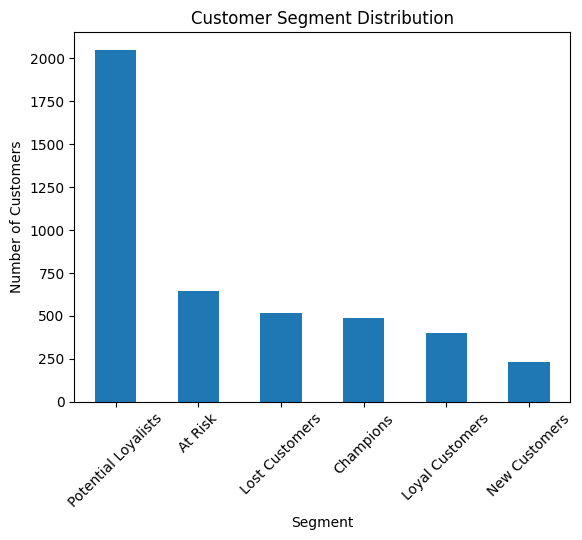

In [35]:
import matplotlib.pyplot as plt

rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [36]:
rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)

Segment
Champions              4432260.100
Potential Loyalists    2380560.963
At Risk                1040932.691
Loyal Customers         519298.850
New Customers           287674.570
Lost Customers          250680.730
Name: Monetary, dtype: float64

In [37]:
segment_counts = rfm['Segment'].value_counts(normalize=True) * 100
segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

print(segment_counts)
print(segment_revenue / segment_revenue.sum() * 100)

Segment
Potential Loyalists    47.199816
At Risk                14.888223
Lost Customers         11.961281
Champions              11.269878
Loyal Customers         9.264808
New Customers           5.415994
Name: proportion, dtype: float64
Segment
At Risk                11.680901
Champions              49.736923
Lost Customers          2.813032
Loyal Customers         5.827349
New Customers           3.228161
Potential Loyalists    26.713635
Name: Monetary, dtype: float64


In [38]:
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

segment_summary

,Recency,Frequency,Monetary
Segment,,,
At Risk,119.20,4.17,1611.35
Champions,7.44,15.54,9063.93
Lost Customers,262.87,1.00,483.01
Loyal Customers,8.91,4.29,1291.79
New Customers,10.00,1.56,1224.15
Potential Loyalists,87.13,2.75,1162.38


In [39]:
rfm_ml = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_ml.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [40]:
import numpy as np

rfm_log = rfm_ml.copy()

rfm_log['Recency'] = np.log1p(rfm_log['Recency'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])

rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,2.079442,8.368925
12348.0,4.330733,1.609438,7.494564
12349.0,2.995732,0.693147,7.472245
12350.0,5.739793,0.693147,5.815324


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

rfm_scaled[:5]

array([[ 1.46223615, -0.95501313,  3.69616759],
       [-2.03861142,  1.07452296,  1.40875812],
       [ 0.37331015,  0.38643726,  0.71551656],
       [-0.62291426, -0.95501313,  0.69782099],
       [ 1.42479959, -0.95501313, -0.61587654]])

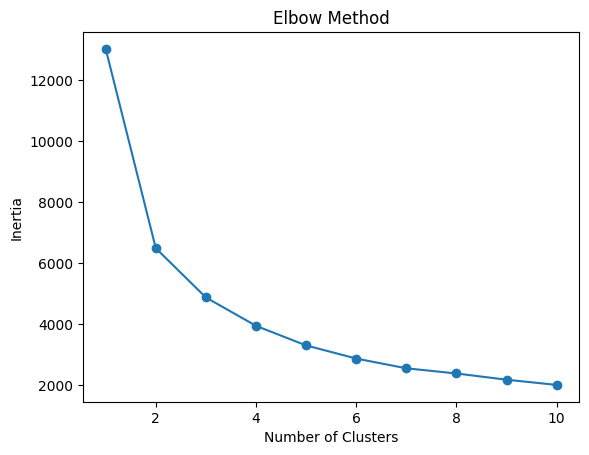

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [43]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Segment,KMeans_Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Lost Customers,2
12347.0,2,7,4310.00,4,4,4,444,12,Champions,1
12348.0,75,4,1797.24,2,3,4,234,9,At Risk,2
12349.0,19,1,1757.55,3,1,4,314,8,Potential Loyalists,0
12350.0,310,1,334.40,1,1,2,112,4,Lost Customers,3


In [44]:
rfm.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)

,Recency,Frequency,Monetary
KMeans_Cluster,,,
0,18.73,2.09,538.23
1,12.11,13.63,8015.42
2,70.70,4.08,1791.09
3,184.02,1.32,342.42


In [45]:
def label_cluster(cluster):
    if cluster == 1:
        return "High Value Customers"
    elif cluster == 2:
        return "At Risk Customers"
    elif cluster == 0:
        return "Regular Customers"
    else:
        return "Lost Customers"

rfm['ML_Segment'] = rfm['KMeans_Cluster'].apply(label_cluster)

rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Segment,KMeans_Cluster,ML_Segment
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Lost Customers,2,At Risk Customers
12347.0,2,7,4310.00,4,4,4,444,12,Champions,1,High Value Customers
12348.0,75,4,1797.24,2,3,4,234,9,At Risk,2,At Risk Customers
12349.0,19,1,1757.55,3,1,4,314,8,Potential Loyalists,0,Regular Customers
12350.0,310,1,334.40,1,1,2,112,4,Lost Customers,3,Lost Customers


In [46]:
pd.crosstab(rfm['Segment'], rfm['ML_Segment'])

ML_Segment,At Risk Customers,High Value Customers,Lost Customers,Regular Customers
Segment,,,,
At Risk,495,9,142,0
Champions,15,474,0,0
Lost Customers,5,0,514,0
Loyal Customers,83,107,0,212
New Customers,1,1,1,232
Potential Loyalists,584,132,937,395


In [47]:
rfm['ML_Segment'].value_counts()

ML_Segment
Lost Customers          1594
At Risk Customers       1183
Regular Customers        839
High Value Customers     723
Name: count, dtype: int64

In [48]:
from sklearn.metrics import silhouette_score

score = silhouette_score(rfm_scaled, rfm['KMeans_Cluster'])
print("Silhouette Score:", round(score, 4))

Silhouette Score: 0.3363


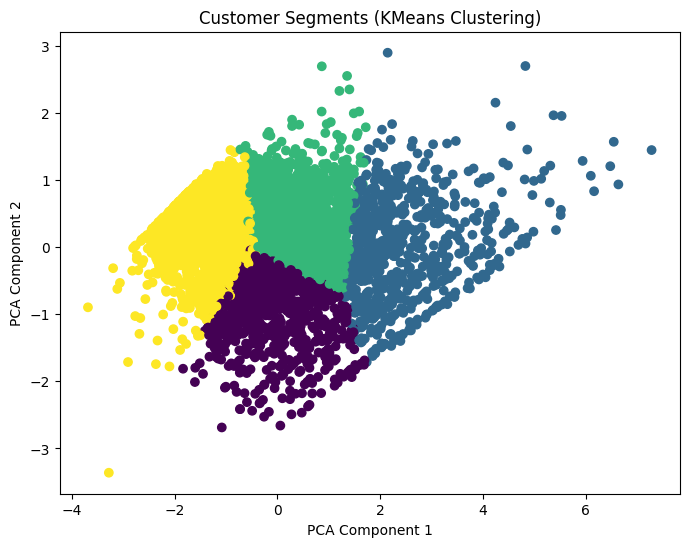

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(rfm_pca[:,0], rfm_pca[:,1], c=rfm['KMeans_Cluster'])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (KMeans Clustering)")
plt.show()

In [50]:
cluster_profile = rfm.groupby('KMeans_Cluster')[['Recency','Frequency','Monetary']].mean()
cluster_profile

,Recency,Frequency,Monetary
KMeans_Cluster,,,
0,18.725864,2.090584,538.231287
1,12.112033,13.634855,8015.424412
2,70.697380,4.076923,1791.090873
3,184.023839,1.318068,342.421268


In [51]:
rfm['KMeans_Cluster'].value_counts()

KMeans_Cluster
3    1594
2    1183
0     839
1     723
Name: count, dtype: int64

In [52]:
cluster_names = {
    0: "New / Low Value",
    1: "Champions",
    2: "Regular Customers",
    3: "At Risk"
}

rfm['Customer_Segment'] = rfm['KMeans_Cluster'].map(cluster_names)

In [53]:
rfm['Customer_Segment'].value_counts()

Customer_Segment
At Risk              1594
Regular Customers    1183
New / Low Value       839
Champions             723
Name: count, dtype: int64

## 📌 Final Cluster Interpretation (KMeans)

Based on RFM averages:

- **Champions (Cluster 1)** – Highly recent, frequent, and high-spending customers. These are core revenue drivers.
- **Regular Customers (Cluster 2)** – Moderate recency and spending. Strong candidates for upselling.
- **New / Low Value (Cluster 0)** – Recently acquired but low spending. Potential to nurture.
- **At Risk (Cluster 3)** – Long time since last purchase, low frequency and spend. Require re-engagement campaigns.

---

## 📌 Strategic Business Actions

- Offer loyalty rewards to Champions  
- Upsell Regular Customers through recommendations  
- Provide onboarding incentives to New customers  
- Launch win-back campaigns for At Risk customers  

In [54]:
revenue_segment = rfm.groupby('Customer_Segment')['Monetary'].sum().sort_values(ascending=False)
revenue_segment

Customer_Segment
Champions            5795151.850
Regular Customers    2118860.503
At Risk               545819.501
New / Low Value       451576.050
Name: Monetary, dtype: float64

📌 Final Conclusion

This project applied RFM analysis and KMeans clustering to segment customers based on behavioral patterns.
Model validation using Silhouette Score (0.3363) confirmed moderate but meaningful cluster separation.
PCA visualization further demonstrated structural grouping in customer behavior.

The analysis revealed that a small segment of high-value customers (Champions) drives the majority of revenue, emphasizing the importance of retention-focused strategies.

This segmentation framework enables targeted marketing, improved customer lifetime value, and data-driven decision-making.